# Pandas
Documentation : https://pandas.pydata.org/docs/reference/io.html

#### Sommaire :
* [1](#1) : Les bases de Pandas
    * [1.1](#1.1) : Charger des données dans un dataframe
    * [1.2](#1.2) : Nettoyage d'un dataset
    * [1.3](#1.3) : Groupby() et value_counts()
* [2](#2) : Les séries temporelles
    * [2.1](#2.1) : Travailler avec les séries temporelles
    * [2.2](#2.2) : Resample
    * [2.3](#2.3) : Aggregate
    * [2.4](#2.3) : Moving Average et EWM
    * [2.5](#2.3) : Comparaison de 2 série temporelles

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

**Pandas** fonctionne avec deux types d'objet : les **dataframes** et les **séries**. Les séries se composent d'un tableau numpy 1D et d'un index. Chaque colonne d'un dataframe est une série partageant le même index. Un data frame est comme un dictionnaire contenant des séries (dataframe["colonne"] = une série). On peut donc utiliser des opérations d'indexing, de slicing et de booléans masking.

# 1. Les bases de pandas <a class="anchor" id="1"></a>
### 1.1. Charger des données dans un dataframe <a class="anchor" id="1.1"></a>
* **pd.read_excel**() : pour lire un fichier .xls
* **pd.read_csv**() : pour lire un fichier .csv
* fonctionne aussi avec les formats json, html, sql...

In [2]:
data = pd.read_excel("titanic.xls")

* **.shape** : retourne la taille du dataframe
* **.columns** : retourne les colonnes du dataframe
* **.head()** : affiche les premières lignes du dataframe

In [3]:
print("dimensions du data frame :", data.shape)
print(data.columns)

dimensions du data frame : (1309, 14)
Index(['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest'],
      dtype='object')


In [4]:
data.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


### 1.2. Nettoyage d'un dataset <a class="anchor" id="1.2"></a>
* **.drop**([nom de la colonne]) : permet d'éliminer des lignes ou colonnes du dataframe

In [5]:
data = data.drop(["name", "sibsp", "parch", "ticket", "fare", "cabin", "embarked", "boat", "body", "home.dest"], axis=1)

In [6]:
data.head()

,pclass,survived,sex,age
0,1,1,female,29.0000
1,1,1,male,0.9167
2,1,0,female,2.0000
3,1,0,male,30.0000
4,1,0,female,25.0000


Quand il manque des données dans une des colonnes du dataset, 2 possibilités :
* **.fillna**() : remplace les valeurs manquantes par une valeur de remplacement, comme la moyenne de la colonne. Attention, on corrompt le dataset.
* **.dropna**(axis=) : on supprime les lignes pour lesquels il manque des données. On perd de l'information mais on ne change pas la réalité.

In [7]:
data = data.dropna(axis=0)
print("dimensions du data frame :", data.shape)

dimensions du data frame : (1046, 4)


### 1.3. Fonctions utiles <a class="anchor" id="1.3"></a>
* **df.describe**() : statistiques de base pour chacune des colonnes du tableau.
* **df.value_counts**() : compte les échantillons pour les valeurs d'une variable.
* **df.groupby**() : regroupe les variables en groupe, sur lesquelles on peut faire des statistiques.
* **df.set_index**() : change l'indexage du dataframe, avec une des variables par exemple.
* **df.iloc**() : localisation par index commme dans numpy
* **df.loc**() : localisation par index sur les colonnes
* **df["colonne"].map**() : permet d'effectuer une fonction sur chaque élément d'une colonne.
* **df.apply**() : applique une fonction sur tous les éléments du dataframe.
* **df["colonne"].replace**([...], [...]) : remplace une valeur par une autre. Par exemple un mot par un nombre pour pouvoir faire des calculs.
* **df["colonne"].astype("category").cat.codes** : convertit les catégories en valeur numérique

Remarques :
* On peut ajouter l'argument **inplace=True** dans chacune des fonction pour modifier le dataset au lieu d'écrire data = data(...)
* On peut utiliser certaines fonctions **matplotlib** directement dans **pandas** : **df.plot**(bins=...), **df.plot.bar**(x=..., y=...), **df.hist**(), **df.plot.scatter**(), **pd.plotting.scatter_matrix**(df), etc...

In [8]:
data.describe() # Statistiques principales du dataframe

,pclass,survived,age
count,1046.000000,1046.000000,1046.000000
mean,2.207457,0.408222,29.881135
std,0.841497,0.491740,14.413500
min,1.000000,0.000000,0.166700
25%,1.000000,0.000000,21.000000
50%,2.000000,0.000000,28.000000
75%,3.000000,1.000000,39.000000
max,3.000000,1.000000,80.000000


In [9]:
data["pclass"].value_counts() # compte le nombre de passager dans chaque classe

3    501
1    284
2    261
Name: pclass, dtype: int64

In [10]:
data.groupby(["sex", "pclass"]).mean() 

survived        age
sex    pclass                     
female 1       0.962406  37.037594
       2       0.893204  27.499191
       3       0.473684  22.185307
male   1       0.350993  41.029250
       2       0.145570  30.815401
       3       0.169054  25.962273

<AxesSubplot:>

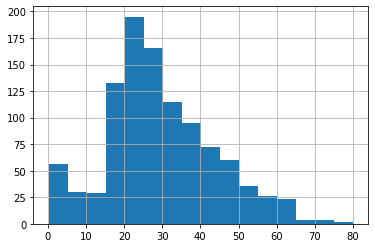

In [11]:
data["age"].hist(bins=16) # On peut directement générer un graphique matplotlib !

In [67]:
def categories_ages(age):
    if age <= 20:
        return "<20 ans"
    elif (age > 20 and age <= 30):
        return "20-30 ans"
    elif (age > 30 and age <= 40):
        return "30-40 ans"
    elif age > 40:
        return ">40 ans"

data["age"].map(categories_ages).head()

0    20-30 ans
1      <20 ans
2      <20 ans
3    20-30 ans
4    20-30 ans
Name: age, dtype: object

# 2. Les séries temporelles <a class="anchor" id="2"></a>
### 2.1. Travailler avec les séries temporelles <a class="anchor" id="2.1"></a>
Pour préciser que l'on travaille avec des dates, on ajoute dans la fonction **pd.read_...** :
* **index_col**="Date" : pour mettre les dates en index
* **parse_dates**=True : pour indiquer l'index est au format date

In [18]:
bitcoin = pd.read_csv("BTC-USD.csv", index_col="Date", parse_dates=True)

In [19]:
bitcoin.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800.0
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200.0
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700.0
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600.0
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100.0


<AxesSubplot:xlabel='Date'>

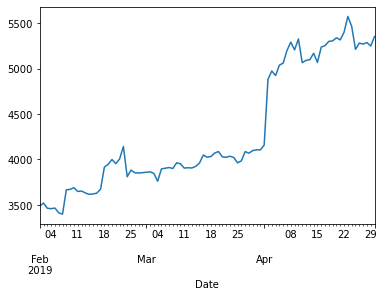

In [20]:
bitcoin.loc["2019-02":"2019-04", "Close"].plot() # On peut faire de l'indexage avec les dates

### 2.2. Resample <a class="anchor" id="2.2"></a>
* **df.resample**("...") : permet de regrouper les donner selon une fréquence. **Y** : années, **M** : mois, **W** : semaine, **D** : jour, **h** : heure, **m** : minute, **s** : seconde, **ms** : milliseconde, **us** : microseconde, **ns** : nanoseconde.

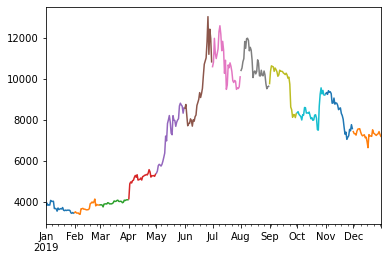

In [33]:
# On observe les mois de l'années 2019
bitcoin.loc['2019', 'Close'].resample('M').plot()
plt.show()

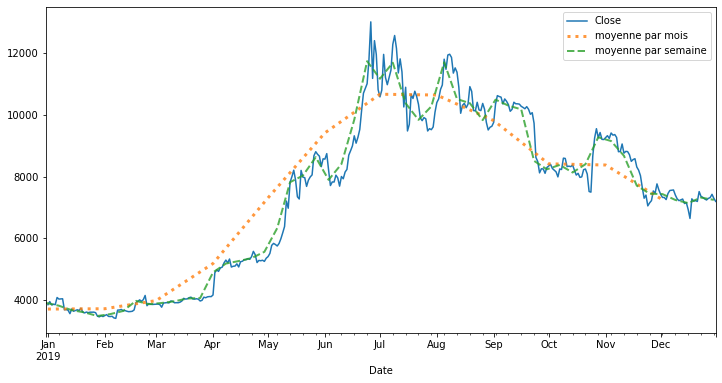

In [34]:
# Exemple de figure plus complète
plt.figure(figsize=(12, 6))
bitcoin.loc['2019', 'Close'].plot()
bitcoin.loc['2019', 'Close'].resample('M').mean().plot(label='moyenne par mois', lw=3, ls=':', alpha=0.8)
bitcoin.loc['2019', 'Close'].resample('W').mean().plot(label='moyenne par semaine', lw=2, ls='--', alpha=0.8)
plt.legend()
plt.show()

### 2.3. Aggregate <a class="anchor" id="2.3"></a>
* **df.agg**() : Rassemble dans un seul tableau plusieurs statistiques que l'on réalise par dessus un resample. 

In [42]:
m = bitcoin['Close'].resample('W').agg(['mean', 'std', 'min', 'max'])
m.head()

,mean,std,min,max
Date,,,,
2014-09-21,416.859003,25.353136,394.79599,457.334015
2014-09-28,407.692566,18.638417,377.18100,435.790985
2014-10-05,361.426570,26.660889,320.51001,386.944000
2014-10-12,355.234580,16.981631,330.07901,378.549011
2014-10-19,390.479854,6.273744,382.55600,400.869995


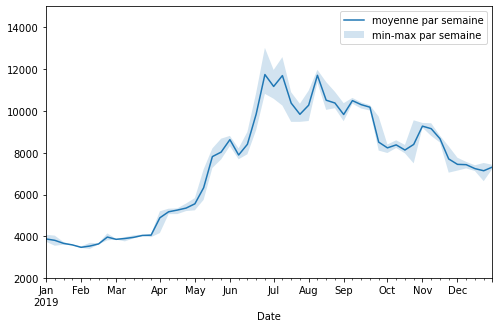

In [51]:
# Création d'un figure avec incertitude
plt.figure(figsize=(8, 5))
m['mean']['2019'].plot(label='moyenne par semaine')
plt.fill_between(m.index, m['max'], m['min'], alpha=0.2, label='min-max par semaine') # Trace la zone d'incertitude
plt.ylim(2000, 15000)

plt.legend()
plt.show()

### 2.4. Moving Average et EWM <a class="anchor" id="2.4"></a>
Le **Moving average** est une technique permettant de calculer une moyenne sur une fenêtre de valeur. Par exemple on calcule la moyenne sur 7 jour, on se décale d'un jour puis on recalcule la moyenne sur 7 jours et ainsi de suite... On parle de moyenne "glissante" ou "roulante".
* **df.rolling**(window=...) : permet de calculer une moyenne roulante
    * **center**=True : pour que les fenêtres soient au milieu de leur valeur, et non pas décalés.
* **df.ewn**(alpha=...) : valeur mobile exponentielle, une méthode plus puissante pour obtenir une moyenne roulante qui colle mieux aux valeurs. Le paramètre alpha est le facteur de lissage. En effet, avec cette méthode, les valeurs les plus éloignées du centre de la fenêtre sont modérés.

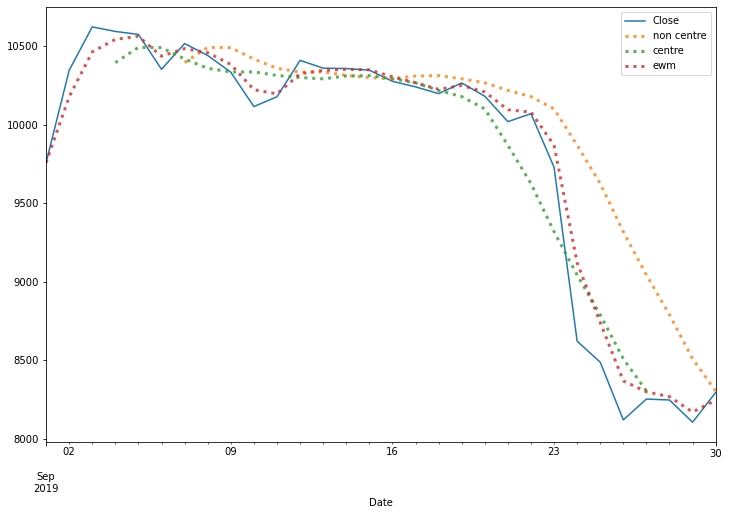

In [55]:
plt.figure(figsize=(12, 8))
bitcoin.loc['2019-09', 'Close'].plot()
bitcoin.loc['2019-09', 'Close'].rolling(window=7).mean().plot(label='non centre', lw=3, ls=':', alpha=0.8)
bitcoin.loc['2019-09', 'Close'].rolling(window=7, center=True).mean().plot(label='centre', lw=3, ls=':', alpha=0.8)
bitcoin.loc['2019-09', 'Close'].ewm(alpha=0.6).mean().plot(label='ewm', lw=3, ls=':', alpha=0.8) # EWN
plt.legend()
plt.show()

### 2.5 Comparaison de 2 séries temporelles <a class="anchor" id="2.5"></a>
* **pd.merge**(x, y, on=..., how=..., suffixes=...) : permet la fusion de 2 dataframes.
    * **on=...** : choix de la colonne d'assemblage
    * **how=...** : manière dont on effectue la fusion : "inner" (assemble selon les index en commun), "outer" (assemble tous les index), "left", "right"
    * **suffixe=("...", "...")** : change les suffixes des anciens datasets.

In [58]:
ethereum = pd.read_csv('ETH-USD.csv', index_col='Date', parse_dates=True)

In [61]:
btc_eth = pd.merge(bitcoin, ethereum, on='Date', how='inner', suffixes=('_btc', '_eth'))
btc_eth.head()

,Open_btc,High_btc,Low_btc,Close_btc,Adj Close_btc,Volume_btc,Open_eth,High_eth,Low_eth,Close_eth,Adj Close_eth,Volume_eth
Date,,,,,,,,,,,,
2015-08-07,278.740997,280.391998,276.365997,279.584991,279.584991,42484800.0,2.831620,3.536610,2.521120,2.772120,2.772120,164329.0
2015-08-08,279.742004,279.928009,260.709991,260.997009,260.997009,58533000.0,2.793760,2.798810,0.714725,0.753325,0.753325,674188.0
2015-08-09,261.115997,267.002991,260.467987,265.083008,265.083008,23789600.0,0.706136,0.879810,0.629191,0.701897,0.701897,532170.0
2015-08-10,265.477997,267.032013,262.596008,264.470001,264.470001,20979400.0,0.713989,0.729854,0.636546,0.708448,0.708448,405283.0
2015-08-11,264.342010,270.385986,264.093994,270.385986,270.385986,25433900.0,0.708087,1.131410,0.663235,1.067860,1.067860,1463100.0


array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
      dtype=object)

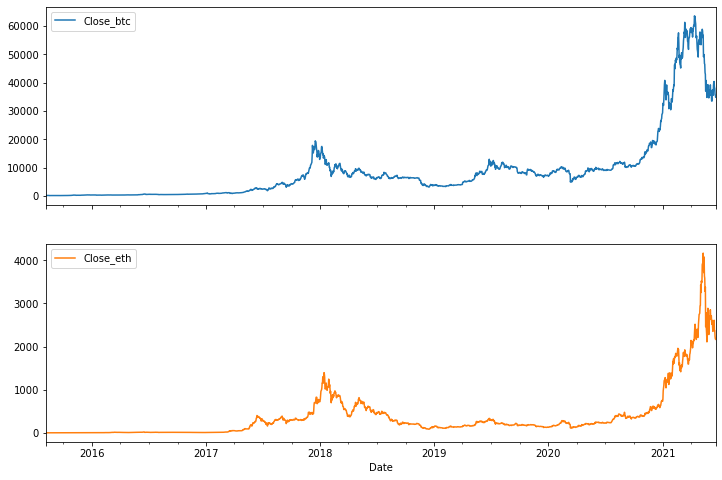

In [63]:
btc_eth[['Close_btc', 'Close_eth']].plot(subplots=True, figsize=(12, 8))

In [64]:
btc_eth[['Close_btc', 'Close_eth']].corr()

,Close_btc,Close_eth
Close_btc,1.000000,0.902713
Close_eth,0.902713,1.000000
